In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 1e93121c-7ed4-4f3b-ac48-93cd4d673968.jpg  'Hum Assignments'
'2.1 math'				    IMG_20210101_101719.jpg
 3.1					    IMG_20210101_170308.jpg
 3.2					   'My Drive'
'Bandarban 2021'			    NID.pdf
 Classroom				   'saaint martin tour'
'Colab Notebooks'			    Shafi
 dataset				    test
'Family Get-together'			    WP
'Fish n Chips'				    yolov4
'Getting started.pdf'			   'পেদা টিং টিং'


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam



train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        brightness_range=[1.0,2.0],
        #validation_split=0.5
        )
train_generator = train_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/training',
        target_size=(200, 200),
        color_mode='grayscale',
        batch_size=64,
        shuffle=True,
        class_mode='categorical',
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/validation',
        target_size=(200, 200),
        color_mode='grayscale',
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )


train_generator.class_indices
train_generator.classes

Found 3388 images belonging to 5 classes.
Found 340 images belonging to 5 classes.


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
model=Sequential()
 
model.add(Conv2D(64,kernel_size=(9,9),activation='relu',padding='same',input_shape=(200,200,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
 
model.add(Conv2D(128,kernel_size=(7,7),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
 
model.add(Conv2D(256,kernel_size=(5,5),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 256)       8

In [ ]:
model.compile(loss='categorical_crossentropy', 
              #optimizer=RMSprop(lr=0.0001),
              optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
                    epochs=250,
                    validation_data=valid_generator,
                    )

Epoch 1/250
54/54 [==============================] - 2001s 37s/step - loss: 8.1659 - accuracy: 0.3836 - val_loss: 2.8874 - val_accuracy: 0.2765
Epoch 2/250
54/54 [==============================] - 37s 686ms/step - loss: 1.3805 - accuracy: 0.5128 - val_loss: 2.3592 - val_accuracy: 0.3382
Epoch 3/250
54/54 [==============================] - 37s 680ms/step - loss: 1.6294 - accuracy: 0.4971 - val_loss: 1.9231 - val_accuracy: 0.3382
Epoch 4/250
54/54 [==============================] - 37s 678ms/step - loss: 1.2561 - accuracy: 0.5276 - val_loss: 1.9531 - val_accuracy: 0.3529
Epoch 5/250
54/54 [==============================] - 37s 679ms/step - loss: 1.1553 - accuracy: 0.5604 - val_loss: 2.5126 - val_accuracy: 0.3529
Epoch 6/250
54/54 [==============================] - 37s 679ms/step - loss: 1.2259 - accuracy: 0.5443 - val_loss: 2.3926 - val_accuracy: 0.3529
Epoch 7/250
54/54 [==============================] - 37s 679ms/step - loss: 1.0332 - accuracy: 0.5611 - val_loss: 1.9833 - val_accuracy:

In [ ]:
model.save('/mydrive/dataset/BatchNorm250.model')

INFO:tensorflow:Assets written to: /mydrive/dataset/BatchNorm250.model/assets


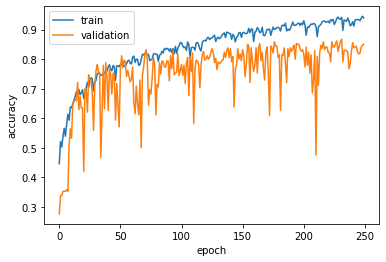

In [ ]:
abc='Accuracy vs Epoch Graph_250'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('Epoch vs Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.savefig(f'/mydrive/dataset/Saved Images Final/bOO/{abc}.png',bbox_inches="tight",dpi=520)
#make sure plt,=.savefig is before
plt.show()

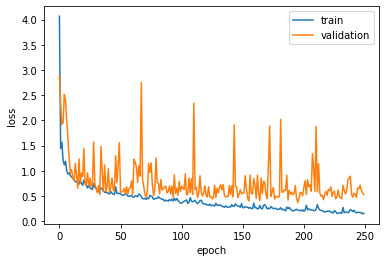

In [ ]:
abc='Loss vs Epoch Graph_250'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Epoch vs Accuracy Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper right')
plt.savefig(f'/mydrive/dataset/Saved Images Final/bOO/{abc}.png',bbox_inches="tight",dpi=520)
#make sure plt,=.savefig is before
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        r'/mydrive/dataset/Final Dataset/testing',
        target_size=(200, 200),
        color_mode='grayscale',
        batch_size=64,
        class_mode='categorical',
        shuffle=False,
        seed=42)

test_imgs, test_labels = next(test_generator)

Found 320 images belonging to 5 classes.


In [ ]:
model = keras.models.load_model('/mydrive/dataset/BatchNorm250.model')
predictions = model.predict(x=test_generator, verbose=0)
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
import sklearn    
from sklearn.metrics import confusion_matrix

model = keras.models.load_model('/mydrive/dataset/BatchNorm250.model')
predictions = model.predict(x=test_generator, verbose=0)
np.round(predictions)

y_true=test_generator.classes
y_pred=np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization
[[62  0  1  0  1]
 [ 0 56  0  8  0]
 [ 7  0 48  9  0]
 [ 0  8  7 49  0]
 [ 0  2  0  0 62]]


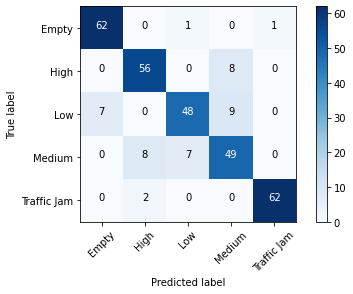

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['Empty', 'High', 'Low', 'Medium', 'Traffic Jam']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
abc='Confusion Matrix_BatchNorm_250'
plt.savefig(f'/mydrive/dataset/Saved Images/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from sklearn.metrics import accuracy_score

print('Prediction Accuracy:', "{:.2f}".format(100*accuracy_score(y_true, y_pred))+"%")

Prediction Accuracy: 86.56%


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(
    y_true,
    y_pred,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Empty       0.90      0.97      0.93        64
        High       0.85      0.88      0.86        64
         Low       0.86      0.75      0.80        64
      Medium       0.74      0.77      0.75        64
 Traffic Jam       0.98      0.97      0.98        64

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.86       320
weighted avg       0.87      0.87      0.86       320



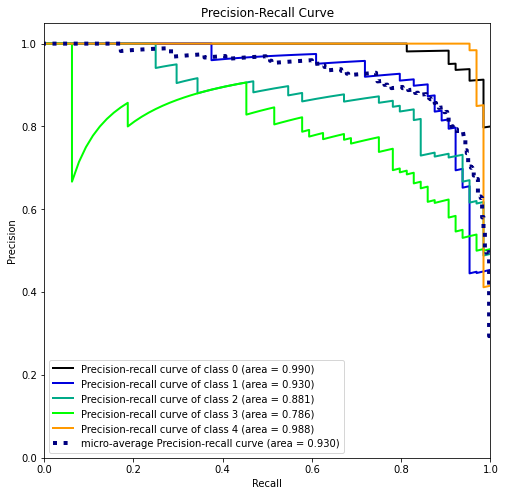

In [ ]:
skplt.metrics.plot_precision_recall(
    y_true,
    predictions,
    figsize=(8,8))
abc='Precision Recall_BatchNorm_250_Final'
plt.savefig(f'/mydrive/dataset/Saved Images Final/bOO/{abc}.png',bbox_inches="tight",dpi=520)

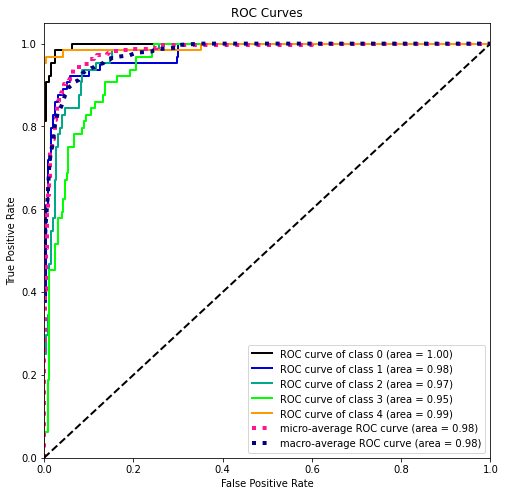

In [ ]:
skplt.metrics.plot_roc(
    y_true,
    predictions,
    figsize=(8,8))
abc='ROC Curve_BatchNorm_250_Final'
plt.savefig(f'/mydrive/dataset/Saved Images Final/bOO/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from keras.utils import to_categorical

val= to_categorical(test_generator.classes)
print(val)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=-1)[:,-n:]
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]):
      if ts[i] in best_n[i,:]:
        successes += 1
    return float(successes)/ts.shape[0]

print('Top 2 Accuracy:', "{:.2f}".format(100*top_n_accuracy(preds=predictions, truths=val, n=2))+"%")

Top 2 Accuracy: 99.06%
